# **Laboratorijska vježba 3**: Zadaci za samostalni rad

## **Podaci iz popisa stanovništa u SAD-u iz 2015. godine**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka dobiven iz popisa stanovništva 2015. godine u SAD-u. Skup podataka dostupan je u *Data/acs2015_county_data.csv*. 


In [ ]:
!head Data/acs2015_county_data.csv

CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats

In [ ]:
data_folder = './Data/'
df = pd.read_csv(data_folder + 'acs2015_county_data.csv')

In [ ]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

## **Zadatak 1: Izračun deskriptivne statistike i testiranje distribucija**

Za numeričke varijable u skupu podataka izračunajte osnovne mjere u okviru deskriptivne statistike. Zatim se fokusirajte na dohodak po stanovniku države (*IncomePerCap*). Koliko u prosjeku zarađuju stanovnici SAD-a? Kolika je medijalna plaća? 

In [ ]:
df.describe()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


In [ ]:
#prosjecna zarada 
df['IncomePerCap'].mean()

23981.771739130436

In [ ]:
df['IncomePerCap'].median()

23460.0

Pokušajte steći dublji uvid u prihod po stanovniku. Može li se prepoznati distribucija iz koje potječi ovi podaci? Potkrijepite Vaš zaključak grafičkom metodom i rezultatima statističkog testa.

(0.0637621121184162, 0.0009999999999998899)

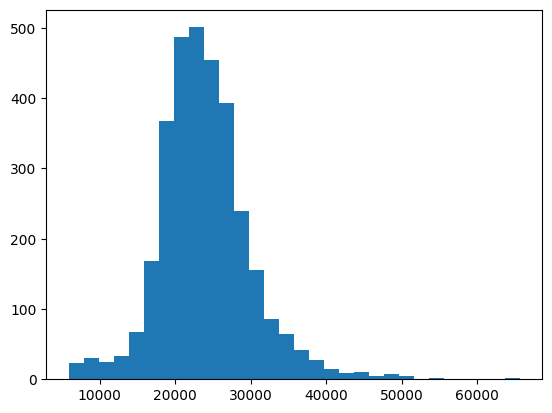

In [ ]:
plt.hist(df['IncomePerCap'],bins=30)

diagnostic.kstest_normal(df['IncomePerCap'], dist='norm')

Izračunajte osnovne mjere u okviru deskriptivne statistike za broj stanovnika države (*TotalPop*) te prokomentirajte dobivene rezultate.

In [ ]:
df['TotalPop'].describe()

#total_population=df['TotalPop']

#mod 
#total_population.mode()


#varijanca
#np.var(total_population)

#zaobljenost
#total_population.kurtosis()

count    3.220000e+03
mean     9.940935e+04
std      3.193055e+05
min      8.500000e+01
25%      1.121800e+04
50%      2.603500e+04
75%      6.643050e+04
max      1.003839e+07
Name: TotalPop, dtype: float64

Pokušajte steći dublji uvid u broj stanovnika. Može li se prepoznati distribucija iz koje potječu ovi podaci? Potkrijepite Vaš zaključak grafičkom metodom i rezultatima statističkog testa.

(0.37787608613878587, 0.0009999999999998899)

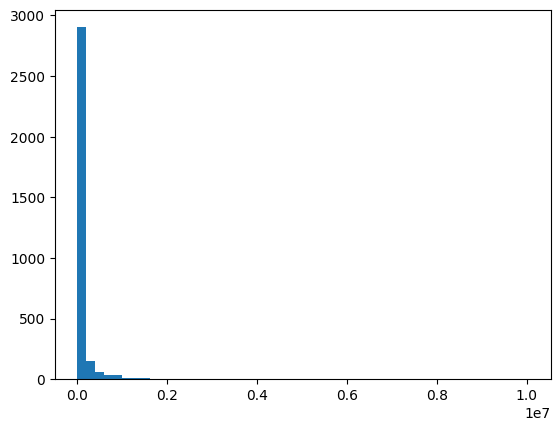

In [ ]:
plt.hist(df['TotalPop'], bins=50)
diagnostic.kstest_normal(df['TotalPop'], dist='norm')
#diagnostic.kstest_normal(df['TotalPop'], dist='exp') #(0.29877233230219885, 0.0009999999999998899)
#vraća kritičnu vrijednost  D  i  p -vrijednost testa 
#Ako je  p -vrijednost manja od 0.05, znači da možemo odbaciti nultu hipotezu da podaci potječu iz normalne distribucije. 


## **Zadatak 2: Ispitivanje odnosa između dvije varijable**

Pokušajte odgovoriti na pitanje je li dohodak po stanovniku države u korelaciji s nezaposlenošću. Ispitajte i linearnu i monotonu korelaciju.

In [ ]:
stats.pearsonr(df['IncomePerCap'], df['Unemployment']) #linearna

PearsonRResult(statistic=-0.5475960044237943, pvalue=2.043834312917008e-251)

In [ ]:
stats.spearmanr(df['IncomePerCap'], df['Unemployment']) #monotona

SignificanceResult(statistic=-0.5610346008485645, pvalue=1.861766816019713e-266)

## **Zadatak 3: Testiranje hipoteza**

Zarađuju li stanovnici države New York više od stanovnika države Kalifornija? Pokušajte dati odgovor na ovo pitanje pomoću deskriptivne statistike.

In [ ]:
NY = df[df['State'] == 'New York']['IncomePerCap']
K = df[df['State'] == 'California']['IncomePerCap']

NY.describe()

count       62.000000
mean     28189.758065
std       7196.801210
min      18456.000000
25%      24255.750000
50%      25891.000000
75%      30319.250000
max      64993.000000
Name: IncomePerCap, dtype: float64

In [ ]:
K.describe()
#Iako je srednja vrijednost NY veca medijan nam govori da vise zaraduju u Kaliforniji (veci broj ljudi) iako su vrijednosti gotovo podjednake

count       58.000000
mean     27902.603448
std       8672.312531
min      16143.000000
25%      21409.000000
50%      27146.500000
75%      31214.500000
max      60236.000000
Name: IncomePerCap, dtype: float64

Kako bi potkrijepili dobivene zaključke, provedite testiranje hipoteza. Neka nulta hipoteza pretpostavlja da nema statistički značajne razlike u dohotku stanovnika ovih država. Testirajte hipotezu pomoću dvostranog t-testa (*two-sided t-test*). Prokomentirajte dobivenu $p$-vrijednost te donesite zaključak.

In [ ]:


stats.ttest_ind(NY,K,equal_var=False)
#vjerojatnost je velika pa prihvacamo H0 -> nema znacajne razlike u dohotku

Ttest_indResult(statistic=0.19665849300151653, pvalue=0.8444542920395708)

## **Zadatak 4: Kvantificiranje nesigurnosti**

Ponovno promotrimo pitanje zarađuju li stanovnici države New York više od stanovnika države Kalifornija. Ovaj put pokušajte odgovoriti na pitanje pomoću intervala pouzdanosti s razinom pouzdanosti od 95%. Uz izračun, vizualizirajte intervale pouzdanosti na stupčastim dijagramima. 
Pomoć: provjerite preklapaju li se intervali za ove države.

(25909.48972633105, 30470.02640270121)

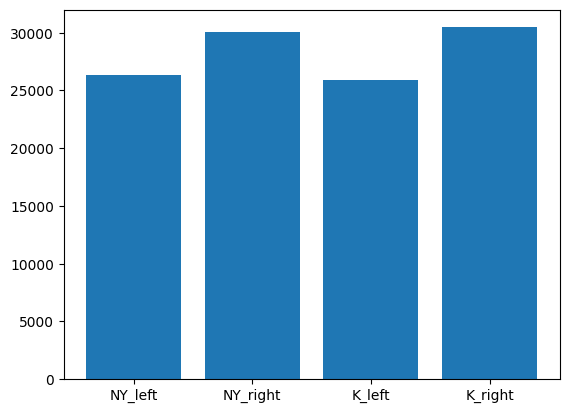

In [ ]:
import scipy.stats as st
ny_interval = st.t.interval(confidence=0.95, df=len(NY)-1, loc=np.mean(NY), scale=st.sem(NY)) #(26362.11277119949, 30017.40335783277)
k_interval = st.t.interval(confidence=0.95, df=len(K)-1, loc=np.mean(NY), scale=st.sem(K)) #(25909.48972633105, 30470.02640270121)
intervali={'NY_left':ny_interval[0],'NY_right':ny_interval[1],'K_left':k_interval[0],'K_right':k_interval[1]}

plt.bar(intervali.keys(),intervali.values())

# Mjesto za Vaš kod
#95%	z=1.960

## **Zadatak 5: Jačanje gospodarstva poticanjem samozapošljavanja**

Pretpostavimo da je najveći prioritet lokalne uprave u 2018. godini povećanje dohotka po glavi stanovnika. U tu svrhu, dužnosnici planiraju usvojiti strategiju poticanja samozapošljavanja kroz niz kampanja, obrazovnih programa i namjenskih sredstava.

Budući da je neetično i nemoguće u ovom okruženju provoditi kontrolirani eksperiment koji uključuje građane (primjerice, otpustiti zaposlenike i prisiliti ih na samozapošljavanje), dužnosnici su od Vas zatražili da utvrdite učinak samozapošljavanja na gospodarstva, oslanjajući se na podatke iz danog skupa podataka.

Koristeći odgovarajuće grafičke i statističke metode, odredite i kvantificirajte vezu između postotka samozaposlenih građana (*SelfEmployed*) i dohotka po glavi stanovnika u svih 3212 država SAD-a. Zarađuju li građani u državama koje imaju veći postotak samozaposlenih više po glavi stanovnika?

IncomePerCap,5878,6774,6792,6974,7076,7242,7245,7263,7270,7299,...,51085,51148,51353,52220,54861,55519,60236,63579,64993,65600
SelfEmployed,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.9,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


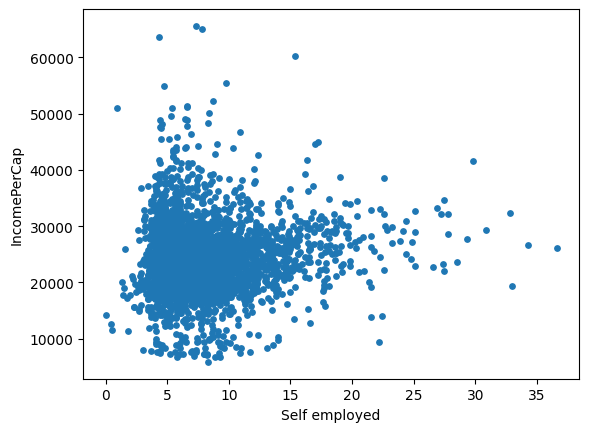

In [ ]:
plt.scatter(df['SelfEmployed'], df['IncomePerCap'], s=15)
plt.xlabel('Self employed')
plt.ylabel('IncomePerCap')

x=['SelfEmployed','IncomePerCap']
self_employed_income = df[x]

#self_employed_income.describe()
pd.crosstab(self_employed_income['SelfEmployed'],self_employed_income['IncomePerCap'])


In [ ]:
#stats.pearsonr(df['IncomePerCap'], df['SelfEmployed'])
stats.spearmanr(df['IncomePerCap'], df['SelfEmployed'])

SignificanceResult(statistic=0.056413673053189874, pvalue=0.0013623847564714516)

Pilot program ove strategije zahvatit će sve okruge unutar ograničenog skupa od tri države. Skup A uključuje Wisconsin, Tennessee i Minnesotu. Kvantificirajte ovisnost dohotka po glavi stanovnika o stopama samozapošljavanja u skupu A.

SignificanceResult(statistic=-0.2366979000103385, pvalue=0.00014010090313655094)

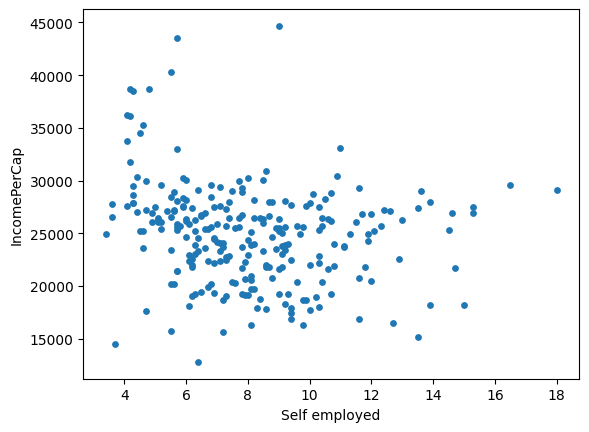

In [ ]:
states_A = ['Wisconsin', 'Tennessee', 'Minnesota']
set_A = df[df['State'].isin(states_A)]

pd.crosstab(set_A['SelfEmployed'], set_A['IncomePerCap'])
#mozda trebam zbog korelacije maknuti strsece vrijednosti
#stats.pearsonr(set_A['SelfEmployed'], set_A['IncomePerCap'])
stats.spearmanr(set_A['SelfEmployed'], set_A['IncomePerCap'])

plt.scatter(set_A['SelfEmployed'], set_A['IncomePerCap'], s=15)
plt.xlabel('Self employed')
plt.ylabel('IncomePerCap')

stats.spearmanr(set_A['SelfEmployed'], set_A['IncomePerCap'])

U kojoj je državi unutar skupa A opaženi učinak samozapošljavanja na dohodak po glavi stanovnika najjači? Je li ovaj učinak pozitivan ili negativan?

In [ ]:
stats.spearmanr(set_A[set_A['State']=='Wisconsin']['SelfEmployed'], set_A[set_A['State']=='Wisconsin']['IncomePerCap'])

SignificanceResult(statistic=-0.46351291044049403, pvalue=4.124859155566003e-05)

In [ ]:
stats.spearmanr(set_A[set_A['State']=='Tennessee']['SelfEmployed'], set_A[set_A['State']=='Tennessee']['IncomePerCap'])

SignificanceResult(statistic=-0.316991392780988, pvalue=0.0017487582457931406)

In [ ]:
stats.spearmanr(set_A[set_A['State']=='Minnesota']['SelfEmployed'], set_A[set_A['State']=='Minnesota']['IncomePerCap'])
#Wisconsin ima najjacu korelaciju (-0.4635) prihvacamo pretpostavku da s povecanjem samozaposlenih ne raste dohodak jer je učinak negativan

SignificanceResult(statistic=-0.21107460598245847, pvalue=0.04970805582462062)

Skup B uključuje države New Jersey, Kansas i Rhode Island. Ponovite analizu iz prijašnjih koraka, ali sada za skup B. U kojem biste od dva skupa A i B preporučili poticanje samozapošljavanja? Objasnite svoje razmišljanje. Što zamjećujete kad u oba skupa promatrate korelaciju unutar svake pojedine države, a što kada promatrate korelaciju za države u cjelini?

SignificanceResult(statistic=0.056413673053189874, pvalue=0.0013623847564714516)

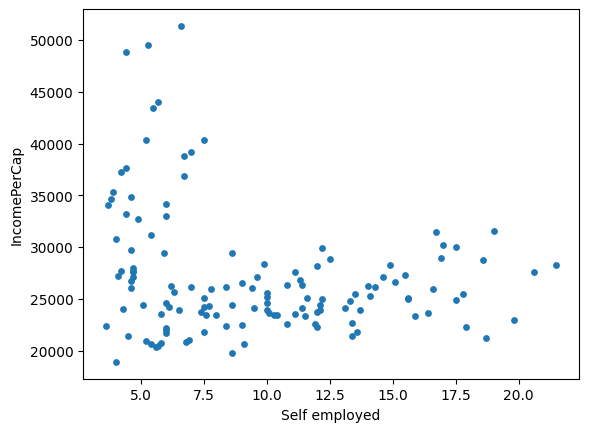

In [ ]:
states_B = ['New Jersey', 'Kansas', 'Rhode Island']
set_B = df[df['State'].isin(states_B)]

#unakrsna tablica
pd.crosstab(set_B['SelfEmployed'], set_B['IncomePerCap'])

plt.scatter(set_B['SelfEmployed'], set_B['IncomePerCap'], s=15)
plt.xlabel('Self employed')
plt.ylabel('IncomePerCap')

stats.spearmanr(set_B[set_B['State']=='New Jersey']['SelfEmployed'], set_B[set_B['State']=='New Jersey']['IncomePerCap']) #(statistic=0.40403460177366013, pvalue=0.06929493068926951)
stats.spearmanr(set_B[set_B['State']=='Kansas']['SelfEmployed'], set_B[set_B['State']=='Kansas']['IncomePerCap'])#(statistic=0.28392575483491556, pvalue=0.0033332825399419903)
stats.spearmanr(set_B[set_B['State']=='Rhode Island']['SelfEmployed'], set_B[set_B['State']=='Rhode Island']['IncomePerCap'])#(statistic=0.9999999999999999, pvalue=1.4042654220543672e-24))

stats.spearmanr(df['SelfEmployed'], df['IncomePerCap'])#(statistic=0.056413673053189874, pvalue=0.0013623847564714516)

# u skupu B je bolje poticati samozapošljavanje jer je veci income u usporedbi sa skupom A 
# u skupu B je pozitivna korelacija dok je u skupu A negativna, veća je vrijednost za pojedinačne primjere nego li je za sve države
#Rhode Island ima najvecu vrijednostt korelacije